### ROA and P/B added in Regression Dataset

In [4]:
import pandas as pd
import numpy as np

# Load the datasets
debt_equity_df = pd.read_csv('Total_Debt_Equity_Dataset.csv')
pb_ratio_df = pd.read_csv('PB ratio.csv')

# Load your existing regression dataset
regression_df = pd.read_csv('REGRESSION_DATASET_updated.csv')

# Define the year columns (2015-2024)
year_columns = [str(year) for year in range(2015, 2025)]

# Convert Debt Equity dataset from wide to long format
debt_long = pd.melt(
    debt_equity_df, 
    id_vars=['Ticker'], 
    value_vars=year_columns, 
    var_name='FY_Year', 
    value_name='Debt_Equity_Ratio'
)
debt_long['FY_Year'] = debt_long['FY_Year'].astype(int)

# Convert PB Ratio dataset from wide to long format
pb_long = pd.melt(
    pb_ratio_df, 
    id_vars=['Ticker'], 
    value_vars=year_columns, 
    var_name='FY_Year', 
    value_name='PB_Ratio'
)
pb_long['FY_Year'] = pb_long['FY_Year'].astype(int)

# Merge the two new datasets
new_data = pd.merge(
    debt_long, 
    pb_long, 
    on=['Ticker', 'FY_Year'], 
    how='inner'
)

# Remove rows with missing values
new_data = new_data.dropna()

print("New Data Info:")
print(f"Shape: {new_data.shape}")
print(f"Unique Tickers: {new_data['Ticker'].nunique()}")
print(f"Year Range: {new_data['FY_Year'].min()} - {new_data['FY_Year'].max()}")

print("\nRegression Dataset Info:")
print(f"Shape: {regression_df.shape}")
print(f"Columns: {regression_df.columns.tolist()}")
print(f"Unique Tickers: {regression_df['Ticker'].nunique() if 'Ticker' in regression_df.columns else 'No Ticker column'}")

# Check if FY_Year exists in regression dataset, if not create it
if 'FY_Year' not in regression_df.columns:
    print("FY_Year column not found in regression dataset. Please check your column names.")
    # If you have a different year column name, specify it here:
    # regression_df = regression_df.rename(columns={'Year': 'FY_Year'})
else:
    regression_df['FY_Year'] = regression_df['FY_Year'].astype(int)

# Merge the new data with existing regression dataset
# Using left join to keep all existing rows and add new columns
updated_regression_df = pd.merge(
    regression_df,
    new_data[['Ticker', 'FY_Year', 'Debt_Equity_Ratio', 'PB_Ratio']],
    on=['Ticker', 'FY_Year'],
    how='left'  # Use 'left' to keep all rows from original dataset
)

print(f"\nUpdated Dataset Shape: {updated_regression_df.shape}")
print(f"New Columns Added: {updated_regression_df.columns.tolist()}")

# Check for missing values in the new columns
print("\nMissing values in new columns:")
print(updated_regression_df[['Debt_Equity_Ratio', 'PB_Ratio']].isnull().sum())

# Save the updated dataset (overwrite the original file)
updated_regression_df.to_csv('REGRESSION_DATASET_updated.csv', index=False)
print("\nREGRESSION_DATASET_updated.csv has been updated with Debt_Equity_Ratio and PB_Ratio columns!")

# Optional: Display sample of the updated data
print("\nSample of updated data (showing new columns):")
sample_columns = ['Ticker', 'FY_Year', 'Debt_Equity_Ratio', 'PB_Ratio'] + \
                [col for col in updated_regression_df.columns if col not in ['Ticker', 'FY_Year', 'Debt_Equity_Ratio', 'PB_Ratio']][:3]
print(updated_regression_df[sample_columns].head(10))

New Data Info:
Shape: (480, 4)
Unique Tickers: 48
Year Range: 2015 - 2024

Regression Dataset Info:
Shape: (577, 16)
Columns: ['Announcement_Date', 'Ticker', 'FY_Year', 'Dividend_Type', 'DPS', 'DPS_Change', 'DPS_Pct_Change', 'Dividend_Direction_Text', 'Dividend_Direction_Num', 'Event_Date_AdjClose', 'Prior_Day_AdjClose', 'Dividend_Yield', 'ROA', 'Market_Cap_Cr', 'CAR', 'Log_Market_Cap_Cr']
Unique Tickers: 48

Updated Dataset Shape: (577, 18)
New Columns Added: ['Announcement_Date', 'Ticker', 'FY_Year', 'Dividend_Type', 'DPS', 'DPS_Change', 'DPS_Pct_Change', 'Dividend_Direction_Text', 'Dividend_Direction_Num', 'Event_Date_AdjClose', 'Prior_Day_AdjClose', 'Dividend_Yield', 'ROA', 'Market_Cap_Cr', 'CAR', 'Log_Market_Cap_Cr', 'Debt_Equity_Ratio', 'PB_Ratio']

Missing values in new columns:
Debt_Equity_Ratio    0
PB_Ratio             0
dtype: int64

REGRESSION_DATASET_updated.csv has been updated with Debt_Equity_Ratio and PB_Ratio columns!

Sample of updated data (showing new columns):
   

### Regression Analysis

Dataset Info:
Shape: (577, 18)
Columns: ['Announcement_Date', 'Ticker', 'FY_Year', 'Dividend_Type', 'DPS', 'DPS_Change', 'DPS_Pct_Change', 'Dividend_Direction_Text', 'Dividend_Direction_Num', 'Event_Date_AdjClose', 'Prior_Day_AdjClose', 'Dividend_Yield', 'ROA', 'Market_Cap_Cr', 'CAR', 'Log_Market_Cap_Cr', 'Debt_Equity_Ratio', 'PB_Ratio']

First few rows:
  Announcement_Date       Ticker  FY_Year Dividend_Type  DPS  DPS_Change  \
0         5/10/2018  ADANIENT.NS     2018         Final  0.4         0.0   
1         5/29/2019  ADANIENT.NS     2019         Final  0.4         0.0   
2         3/12/2020  ADANIENT.NS     2019       Interim  1.0         0.6   
3          5/5/2021  ADANIENT.NS     2021         Final  1.0         0.6   
4          5/4/2022  ADANIENT.NS     2022         Final  1.0         0.0   

   DPS_Pct_Change Dividend_Direction_Text  Dividend_Direction_Num  \
0             0.0               No Change                       0   
1             0.0               No Change       

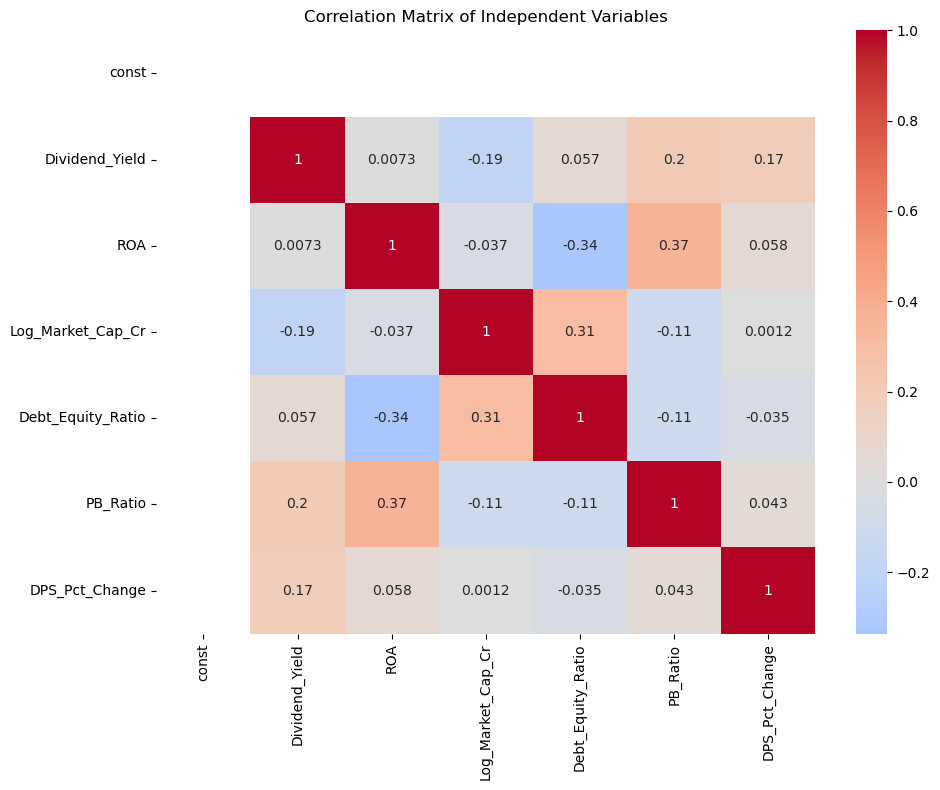

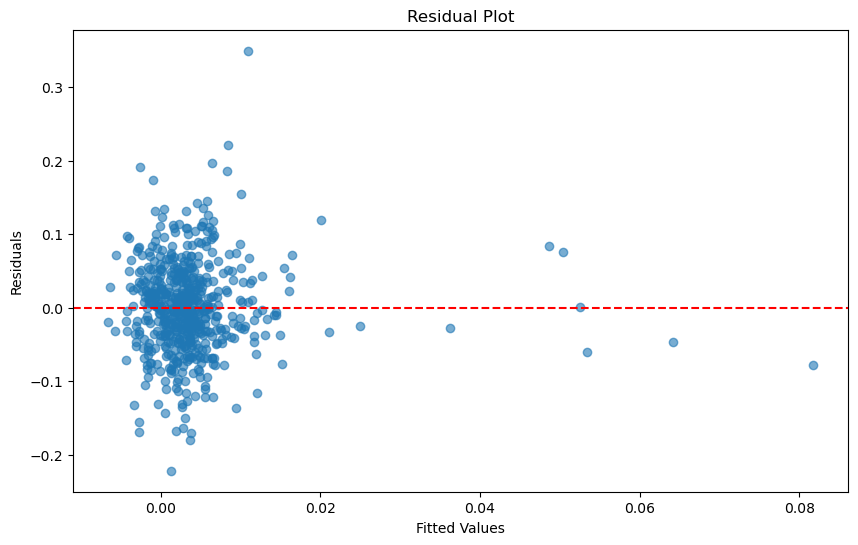

<Figure size 1000x600 with 0 Axes>

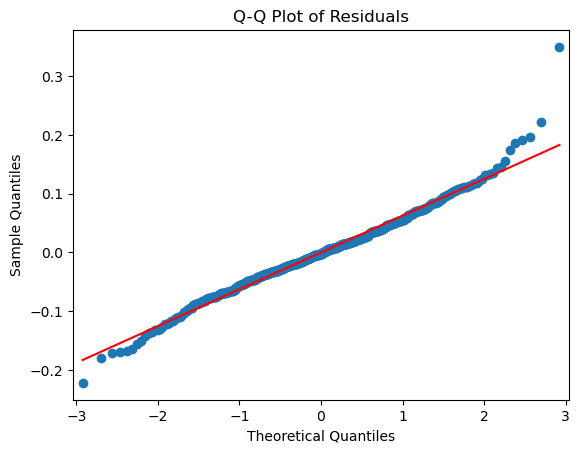


Model Performance on Test Set:
R-squared: -0.0394
RMSE: 0.0602
MSE: 0.0036


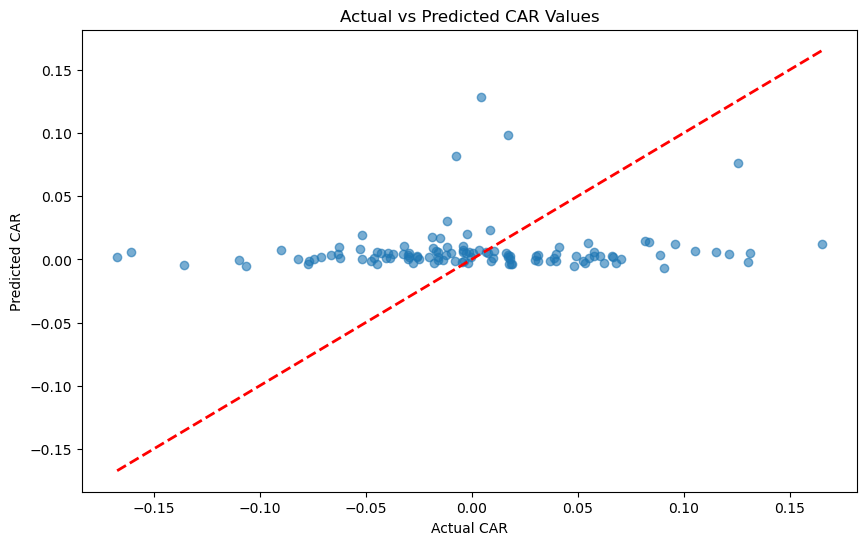


Dataset with predictions saved as 'REGRESSION_DATASET_with_predictions.csv'

INTERPRETATION GUIDANCE
1. Look at the p-values (P>|t|) to determine significance (typically p < 0.05)
2. Check coefficients to understand direction and magnitude of relationships
3. R-squared shows how much variance in CAR is explained by the model
4. VIF > 10 indicates potential multicollinearity issues
5. Check residual plots for model assumptions (linearity, homoscedasticity)


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('REGRESSION_DATASET_updated.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove rows with missing values in the variables we need
df_clean = df.dropna(subset=['CAR', 'Dividend_Yield', 'ROA', 'Log_Market_Cap_Cr', 
                           'Debt_Equity_Ratio', 'PB_Ratio', 'DPS_Pct_Change'])

print(f"\nAfter removing missing values: {df_clean.shape}")

# Define your variables
X = df_clean[['Dividend_Yield', 'ROA', 'Log_Market_Cap_Cr', 
              'Debt_Equity_Ratio', 'PB_Ratio', 'DPS_Pct_Change']]
y = df_clean['CAR']

# Add constant for intercept term
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print regression results
print("\n" + "="*80)
print("OLS REGRESSION RESULTS")
print("="*80)
print(model.summary())

# Additional diagnostics and visualizations
print("\n" + "="*80)
print("ADDITIONAL DIAGNOSTICS")
print("="*80)

# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = X.corr()
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Independent Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual analysis
residuals = model.resid
fitted_values = model.fittedvalues

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# QQ plot for normality of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.savefig('qq_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Train-test split for model validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model on training data
train_model = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = train_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance on Test Set:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

# Compare actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CAR')
plt.ylabel('Predicted CAR')
plt.title('Actual vs Predicted CAR Values')
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the cleaned dataset with predictions
df_clean['Predicted_CAR'] = model.predict(X)
df_clean.to_csv('REGRESSION_DATASET_with_predictions.csv', index=False)
print("\nDataset with predictions saved as 'REGRESSION_DATASET_with_predictions.csv'")

# Interpretation of results
print("\n" + "="*80)
print("INTERPRETATION GUIDANCE")
print("="*80)
print("1. Look at the p-values (P>|t|) to determine significance (typically p < 0.05)")
print("2. Check coefficients to understand direction and magnitude of relationships")
print("3. R-squared shows how much variance in CAR is explained by the model")
print("4. VIF > 10 indicates potential multicollinearity issues")
print("5. Check residual plots for model assumptions (linearity, homoscedasticity)")

### Panel Data Regression

Initial data info:
Shape: (577, 18)
Columns: ['Announcement_Date', 'Ticker', 'FY_Year', 'Dividend_Type', 'DPS', 'DPS_Change', 'DPS_Pct_Change', 'Dividend_Direction_Text', 'Dividend_Direction_Num', 'Event_Date_AdjClose', 'Prior_Day_AdjClose', 'Dividend_Yield', 'ROA', 'Market_Cap_Cr', 'CAR', 'Log_Market_Cap_Cr', 'Debt_Equity_Ratio', 'PB_Ratio']

After cleaning: 577 observations
Unique Tickers: 48
Unique Years: 10

Data types after cleaning:
CAR                  float64
Dividend_Yield       float64
ROA                  float64
Log_Market_Cap_Cr    float64
Debt_Equity_Ratio    float64
PB_Ratio             float64
DPS_Pct_Change       float64
Ticker                object
FY_Year                int64
dtype: object

Checking for non-numeric values:

Final panel data: 577 observations

PANEL DATA REGRESSION RESULTS

1. POOLED OLS:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model: 

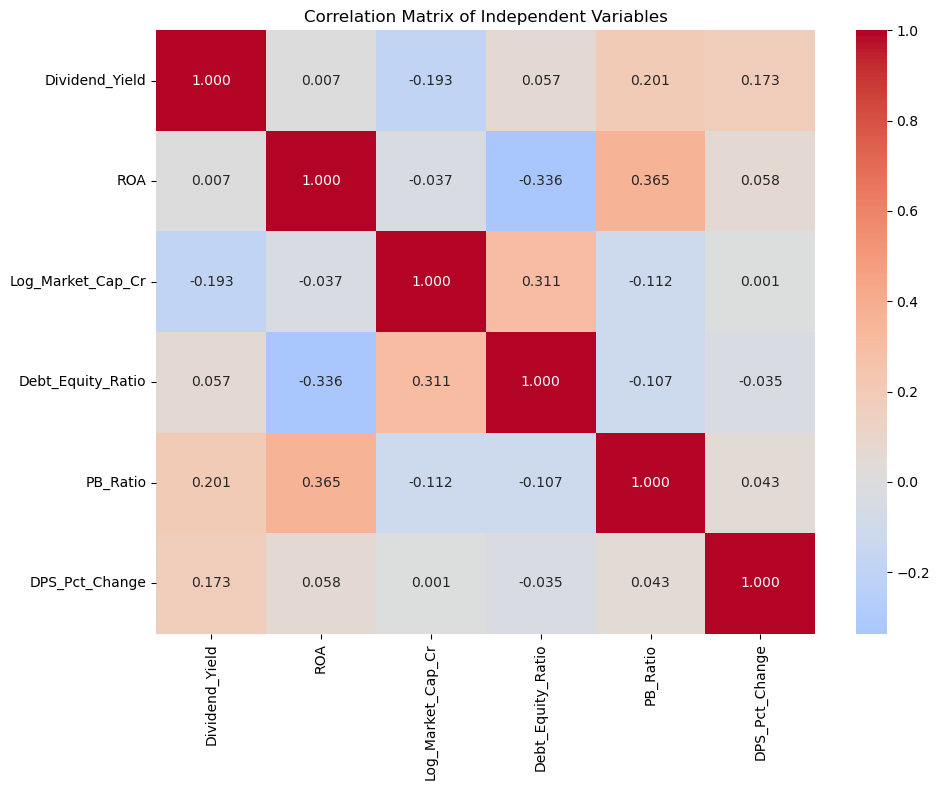


Panel Balance:
Observations per company: 12.02 (min: 2, max: 43)
Observations per year: 57.70 (min: 3, max: 78)

Cleaned panel data saved as 'CLEANED_PANEL_DATA.csv'


In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('REGRESSION_DATASET_updated.csv')

print("Initial data info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Data cleaning and type conversion
def clean_data(df):
    # Convert to numeric, coercing errors to NaN
    numeric_cols = ['CAR', 'Dividend_Yield', 'ROA', 'Log_Market_Cap_Cr', 
                   'Debt_Equity_Ratio', 'PB_Ratio', 'DPS_Pct_Change', 'FY_Year']
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Ensure Ticker is string
    df['Ticker'] = df['Ticker'].astype(str)
    
    return df

df_clean = clean_data(df)

# Remove rows with missing values in key columns
required_cols = ['CAR', 'Dividend_Yield', 'ROA', 'Log_Market_Cap_Cr', 
                'Debt_Equity_Ratio', 'PB_Ratio', 'DPS_Pct_Change', 'Ticker', 'FY_Year']

df_clean = df_clean.dropna(subset=required_cols)

print(f"\nAfter cleaning: {len(df_clean)} observations")
print(f"Unique Tickers: {df_clean['Ticker'].nunique()}")
print(f"Unique Years: {df_clean['FY_Year'].nunique()}")

# Check data types
print("\nData types after cleaning:")
print(df_clean[required_cols].dtypes)

# Check for any remaining non-numeric values
print("\nChecking for non-numeric values:")
for col in required_cols:
    if col != 'Ticker':
        non_numeric = df_clean[col].apply(lambda x: not isinstance(x, (int, float, np.number)))
        if non_numeric.any():
            print(f"Non-numeric values in {col}: {non_numeric.sum()}")

# Prepare panel data
df_panel = df_clean.set_index(['Ticker', 'FY_Year'])
df_panel = df_panel.sort_index()

# Define variables
X_vars = ['Dividend_Yield', 'ROA', 'Log_Market_Cap_Cr', 
          'Debt_Equity_Ratio', 'PB_Ratio', 'DPS_Pct_Change']
y_var = 'CAR'

# Ensure all variables are numeric
for var in X_vars + [y_var]:
    df_panel[var] = pd.to_numeric(df_panel[var], errors='coerce')

# Remove any remaining NaN values after conversion
df_panel = df_panel.dropna(subset=X_vars + [y_var])

print(f"\nFinal panel data: {len(df_panel)} observations")

# Run panel regression
print("\n" + "="*80)
print("PANEL DATA REGRESSION RESULTS")
print("="*80)

try:
    # 1. Pooled OLS for comparison
    print("\n1. POOLED OLS:")
    X_pooled = sm.add_constant(df_panel[X_vars])
    # Convert to numpy arrays to avoid dtype issues
    X_array = np.array(X_pooled, dtype=float)
    y_array = np.array(df_panel[y_var], dtype=float)
    
    pooled_model = sm.OLS(y_array, X_array).fit()
    print(pooled_model.summary())
    
except Exception as e:
    print(f"Pooled OLS failed: {e}")

# 2. Fixed Effects Regression
try:
    print("\n2. FIXED EFFECTS (Entity):")
    
    # Use the linearmodels package which handles panel data better
    fe_model = PanelOLS(df_panel[y_var], sm.add_constant(df_panel[X_vars]), 
                       entity_effects=True).fit(cov_type='clustered', cluster_entity=True)
    print(fe_model.summary)
    
except Exception as e:
    print(f"Fixed Effects failed: {e}")
    print("Trying alternative approach...")
    
    # Alternative: Manual fixed effects using entity dummies
    try:
        # Reset index to get Ticker back as column
        df_temp = df_panel.reset_index()
        entity_dummies = pd.get_dummies(df_temp['Ticker'], prefix='ticker', drop_first=True)
        
        # Combine with main variables
        X_fe = pd.concat([df_temp[X_vars], entity_dummies], axis=1)
        X_fe = sm.add_constant(X_fe)
        y_fe = df_temp[y_var]
        
        # Convert to numpy arrays
        X_array = np.array(X_fe, dtype=float)
        y_array = np.array(y_fe, dtype=float)
        
        fe_model_manual = sm.OLS(y_array, X_array).fit()
        
        print("\nManual Fixed Effects (showing only main variables):")
        print(f"R-squared: {fe_model_manual.rsquared:.4f}")
        print(f"Adj R-squared: {fe_model_manual.rsquared_adj:.4f}")
        
        # Show only main variable coefficients
        main_vars = ['const'] + X_vars
        print("\nCoefficients for main variables:")
        for var in main_vars:
            if var in fe_model_manual.params.index:
                p_val = fe_model_manual.pvalues[var]
                sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
                print(f"{var:20s}: {fe_model_manual.params[var]:8.6f} {sig} (p={p_val:.4f})")
                
    except Exception as e2:
        print(f"Manual FE also failed: {e2}")

# 3. Random Effects
try:
    print("\n3. RANDOM EFFECTS:")
    from linearmodels import RandomEffects
    
    re_model = RandomEffects(df_panel[y_var], sm.add_constant(df_panel[X_vars])).fit()
    print(re_model.summary)
    
except Exception as e:
    print(f"Random Effects failed: {e}")

# 4. Diagnostic checks
print("\n" + "="*80)
print("DIAGNOSTIC CHECKS")
print("="*80)

# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_for_vif = sm.add_constant(df_panel[X_vars])
X_array_vif = np.array(X_for_vif, dtype=float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_array_vif, i) for i in range(X_array_vif.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# Check correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = df_panel[X_vars].corr()
print(corr_matrix)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix of Independent Variables')
plt.tight_layout()
plt.savefig('correlation_matrix_panel.png', dpi=300, bbox_inches='tight')
plt.show()

# Check panel balance
print("\nPanel Balance:")
company_obs = df_panel.groupby(level=0).size()
year_obs = df_panel.groupby(level=1).size()

print(f"Observations per company: {company_obs.mean():.2f} (min: {company_obs.min()}, max: {company_obs.max()})")
print(f"Observations per year: {year_obs.mean():.2f} (min: {year_obs.min()}, max: {year_obs.max()})")

# Save cleaned panel data
df_panel.to_csv('CLEANED_PANEL_DATA.csv')
print("\nCleaned panel data saved as 'CLEANED_PANEL_DATA.csv'")

In [12]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('Merged_Data.csv')

# Calculate natural log of Stock_Returns and Market_Returns
df['Log_Stock_Returns'] = np.log(1 + df['Stock_Returns'])
df['Log_Market_Returns'] = np.log(1 + df['Market_Returns'])

# Save the updated dataframe to a new CSV file
df.to_csv('Merged_Data_with_Log_Returns.csv', index=False)

# Display the first few rows to verify
print(df[['Date', 'Stock_Returns', 'Market_Returns', 'Log_Stock_Returns', 'Log_Market_Returns']].head())

FileNotFoundError: [Errno 2] No such file or directory: 'Merged_Data.csv'